In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # numpy는 배열 사용할 때
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)
(256, 256)


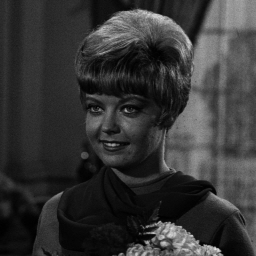

In [62]:
img = cv2.imread('/content/gdrive/My Drive/Ch01/IP/Images/girl.jpg')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(gImg, cmap='gray')
print(gImg1.shape)
cv2_imshow(gImg1)

In [66]:
outImg = np.zeros(gImg1.shape, dtype='uint8')

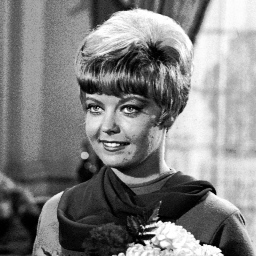

In [68]:
outImg = cv2.equalizeHist(gImg1)
cv2_imshow(outImg)

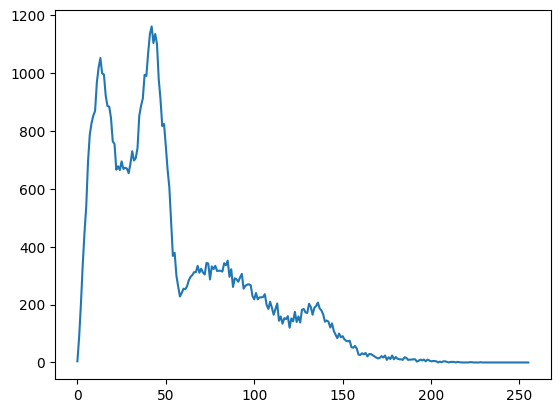

In [69]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 256])
plt.plot(hist)

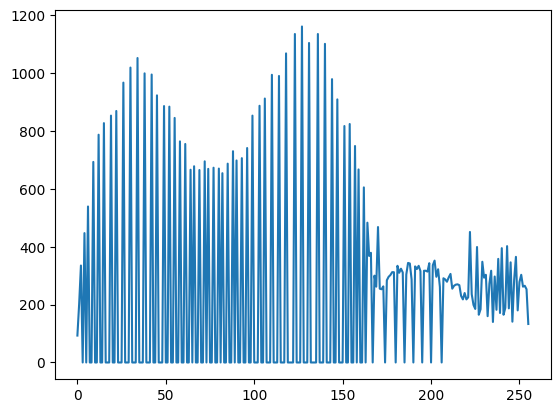

In [70]:
hist = cv2.calcHist([outImg], [0], None, [256], [0, 256])
plt.plot(hist)

In [96]:
myHist = np.zeros((256,1), dtype = np.int32)

히스토그램 만들기

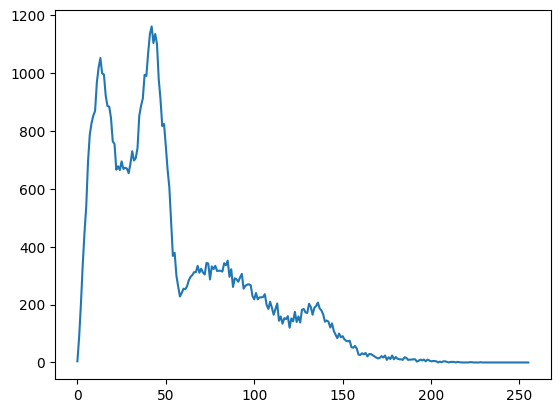

In [97]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    myHist[gImg1[h,w]] += 1

plt.plot(myHist)

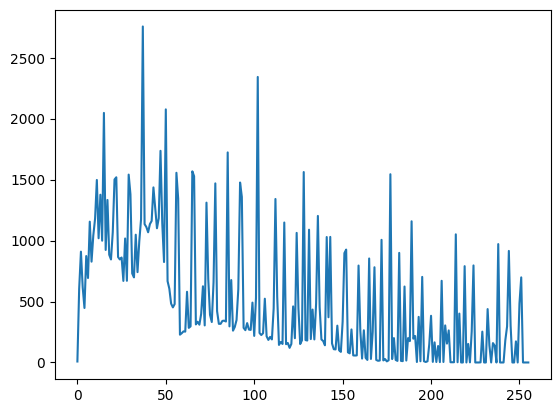

In [98]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    myHist[outImg[h,w]] += 1

plt.plot(myHist)

In [99]:
cumulHist = np.zeros((256,1), dtype = np.int32)

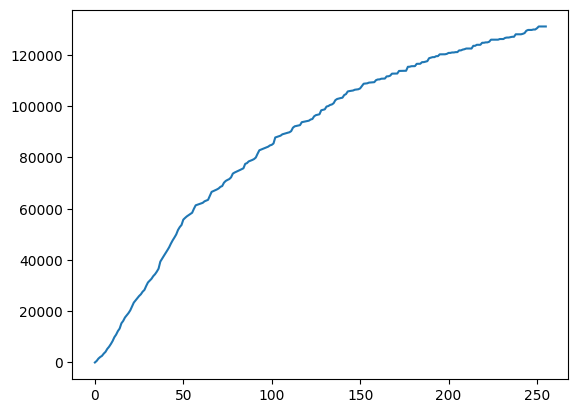

In [100]:
cumulHist[0] = myHist[0]
for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [101]:
equalHist = np.zeros((256,1), dtype = np.int32)

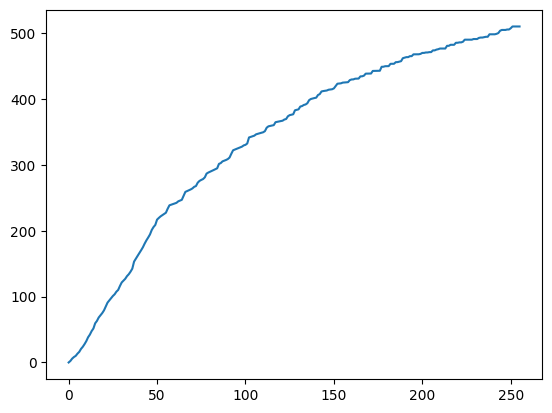

In [102]:
numOfPixel = gImg1.shape[0] * gImg1.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-1562518762.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outImg[h,w] = equalHist[gImg1[h,w]]


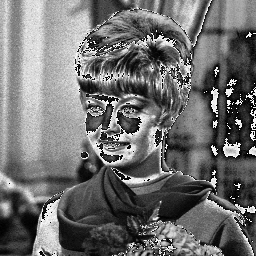

In [103]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    outImg[h,w] = equalHist[gImg1[h,w]]

cv2_imshow(outImg)